## **2주차 복습과제**
## Intro to Deep Learning

### Lesson 1. A Single Neuron

#### What you'll learn how to
- create a **fully-connected** neural network architecture
- apply neural nets to two classical ML problems : **regression & classification**(회귀 & 분류)
- train neural nets with **stochastic gradient descent** (확률적 경사 하강법)
- improve performance with **dropout, batch normalization**, and other techniques


#### What is Deep Learning?
- Deep Learning : 깊은 계층의 연산으로 특정지어지는 기계학습 접근법. 이러한 연산의 길이가 딥러닝 모델로 하여금 실제 데이터셋에서 발견되는 복잡하고 계층적인 패턴들을 분리할 수 있게 하는 요인이다.

- Neural networks : 신경망은 뉴런으로 구성되어 있으며, 각 뉴런은 개별적으로 단순한 계산만을 수행한다. 신경망의 힘은 이러한 뉴런들이 형성할 수 있는 연결의 복잡성에서 나온다.

#### The Linear Unit

- 선형 유닛 신경망의 기본 요소 구성인 개별 뉴런부터 시작해보자. 다이어그램으로 표현하면, 하나의 입력을 가진 뉴런(또는 유닛)은 다음과 같다.
    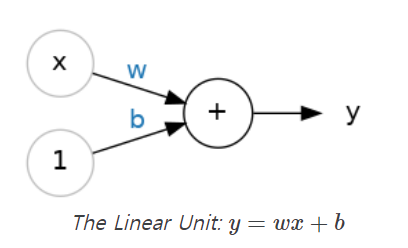
- 입력은 x. 뉴런과의 연결에 가중치 w가 있다. 값이 연결을 통해 흐를 때마다, 그 값에 연결의 가중치를 곱한다. 입력 x에 대해, 뉴런에 도달하는 것은 w * x 이다. 신경망은 가중치를 수정함으로써 '학습'한다.
- b는 편향이라고 부르는 특별한 종류의 가중치. 편향은 어떤 입력 데이터와도 연관되어 있지 않음. 대신, 다이어그램에 1을 넣어 뉴런에 도달하는 값이 단순히 b가 되도록 함.(1 * b = b 이므로) 편향은 뉴런이 입력과 독립적으로 출력을 수정할 수 있게 한다.
- y는 뉴런이 최종적으로 출력하는 값. 출력을 얻기 위해, 뉴런은 연결을 통해 받는 모든 값을 합산한다. 이 뉴런의 활성화는  y = w * x + b, 또는 공식으로는 y = wx + b 이다. (직선의 방정식, 기울기-절편 방정식. w는 기울기, b는 y절편)


#### Example - The Linear Unit as a Model
- 개별 뉴런들은 보통 더 큰 네트워크의 일부로만 기능하지만, 베이스라인으로 단일 뉴런 모델부터 시작하는 것이 종종 유용함. 단일 뉴런 모델은 선형 모델.
-'80 Cereals' 데이터셋에 이것을 어떻게 적용할 수 있는지 생각해보자. '당류(1회 제공량당 g)'를 입력으로 '칼로리(1회 제공량당)'를 출력으로 하여 모델을 훈련시키면, 편향 b = 90, 가중치 w = 2.5를 찾을 수 있다. 1회 제공량당 5g의 당류가 있는 시리얼의 칼로리 함량을 다음과 같이 추정할 수 있다.
    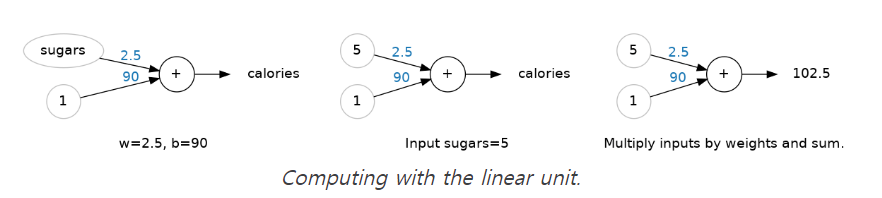
    - `calories = 2.5 x 5 + 90 = 102.5`

#### Multiple Inputs
- '80 Cereals' 데이터셋은 '당류' 외에도 많은 특성이 있다. 모델을 확장하여 섬유질이나 단백질 함량 같은 것들을 포함하고 싶다면? 뉴런에 추가 특성마다 더 많은 입력 연결을 추가하면 된다. 출력을 찾기 위해, 각 입력에 해당 연결 가중치를 곱한 다음 모두 더한다.

    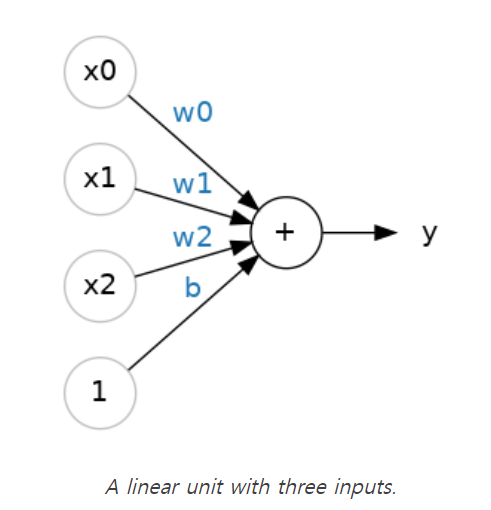
- 공식 : y = w0x0 + w1x1 + w2x2 + b
- 2개의 입력을 가진 선형 유닛은 평면을 맞추고, 그 이상의 입력을 가진 유닛은 초평면을 맞춤.

#### Linear Units in Keras
- Keras에서 모델을 만드는 가장 쉬운 방법 - `nn.Sequential` 이용. -> 신경망을 층의 스택으로 만듦.
- 3개의 입력 특성('당류','섬유질','단백질')을 받아들이고 하나의 출력('칼로리') 생성하는 선형 모델

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- 첫 번째 인자 units, 우리가 원하는 출력의 개수를 정의한다. 이 경우, '칼로리'만을 예측하므로, `units=1` 사용한다.
- 두 번째 인자 input_shape, 입력의 차원을 Keras에 알려준다. `input_shape=[3]`을 설정하면 모델이 3가지 특성을 입력으로 받아들일 수 있음.

#### input_shape가 파이썬 리스트인 이유?
- Pandas 데이터프레임과 같은 표 형식의 데이터.
- 데이터셋의 각 특성마다 하나의 입력이 있고, 특성들은 열로 배열되어 있으므로 항상 `input_shape=[열의 수]`가 될 것이다. Keras가 여기서 리스트를 사용하는 이유는 더 복잡한 데이터셋 사용을 허용하기 위해서이다.

### Lesson 2. Deep Neural Networks

#### Introduction
- 어떻게 deep neural network가 복잡한 종류의 관계를 학습할 수 있는 신경망을 구축할 수 있는지 살펴보자.
- 핵심 아이디어는 모듈성(modularity)으로, 더 단순한 기능 단위로부터 복잡한 네트워크를 구축하는 것.


#### Layers
- 신경망은 일반적으로 뉴런을 층으로 구성한다.
- 공통된 입력 집합을 가진 선형 유닛들을 모으면 밀집층(dense layer)이 된다.
    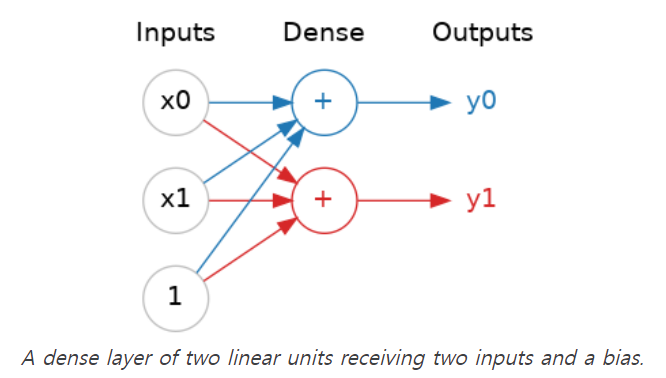
- 신경망의 각 층은 비교적 단순한 종류의 변환을 수행하는 것으로 생각할 수 있다.
- 깊은 층의 스택을 통해, 신경망은 입력을 점점 더 복잡한 방식으로 변환할 수 있다.
- 잘 훈련된 신경망에서는 각 층이 해결책에 조금씩 더 가깝게 만드는 변환이다.

#### The Activation Function
- 두 개의 밀집층 사이에 아무것도 없다면 단일 밀집층 자체보다는 나을 것이 없다. 밀집층만으로는 선과 평면의 세계를 벗어날 수 없다.
- 이때 우리에게 필요한 것이 비선형적인 것. -> 활성화 함수
- 활성화 함수 없이는 신경망은 선형 관계만 학습할 수 있다. 곡선을 맞추기 위해서는 활성화 함수를 사용해야 한다.

    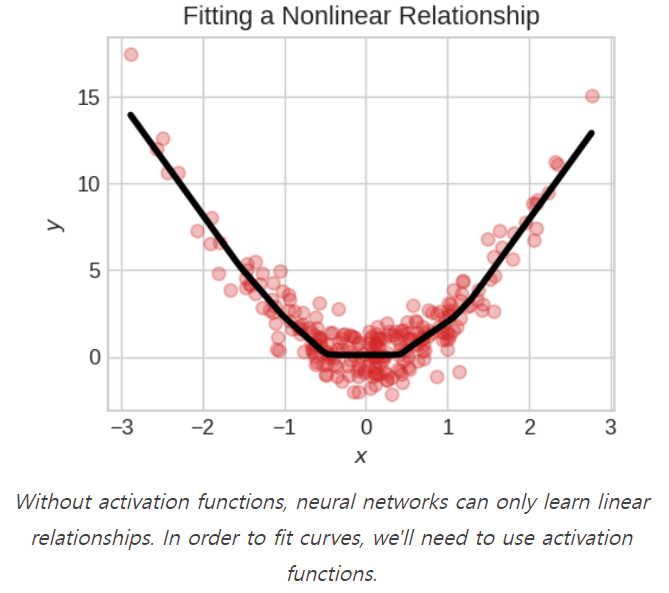
- 활성화 함수 : 단순히 층의 각 출력(its activation)에 적용하는 함수.
- 가장 일반적인 것은 rectifier function max(0, x).
    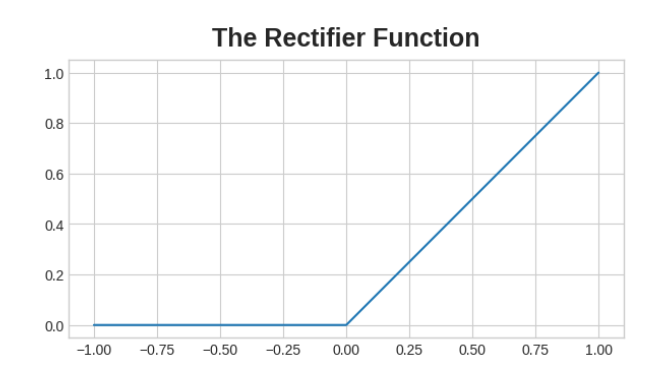
- rectifier 함수를 뉴런의 출력에 적용하면 데이터에 굴곡을 만들어 단순한 직선에서 벗어나게 된다.
- 이 함수를 선형 유닛에 적용하면, rectifier linear unit 또는 ReLU를 얻는다.(그렇기 때문에, ReLU 함수라고 부르는 것이 일반적임.)
- ReLU 활성화를 선형 유닛에 적용한다는 것은 출력이 max(0, w * x + b)가 된다는 것을 의미한다.
    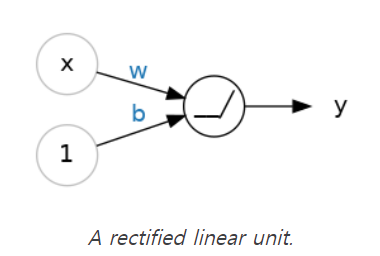


#### Stacking Dense Layers

- 복잡한 데이터 변환을 얻기 위해 어떻게 층을 쌓을 수 있는가?
    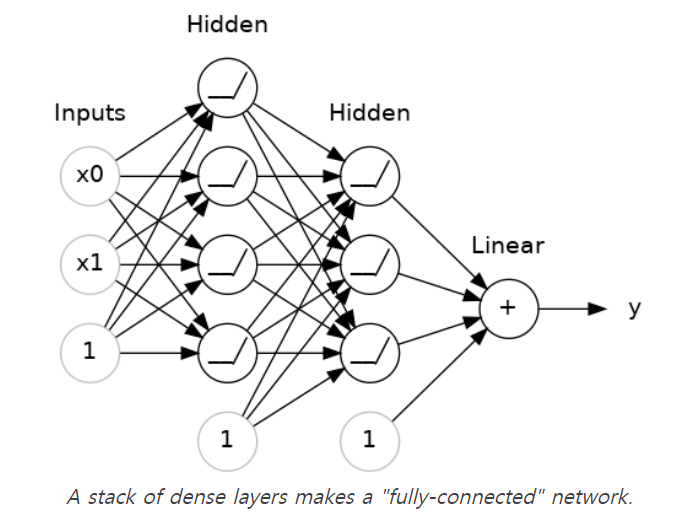
- 출력층 이전의 층들은 때때로 은닉층(hidden layer)이라고 불린다.(그것들의 출력을 직접 볼 수 없기 때문.)
- 최종(출력)층이 선형 유닛. -> 이는 이 네트워크가 회귀 작업에 적합하다는 것을 의미한다.(어떤 임의의 숫자 값을 예측)
- 분류와 같은 다른 작업들은 출력에 활성화 함수가 필요할 수도 있다.


#### Building Sequential Models
- Sequential 모델은 첫 번째부터 마지막까지 순서대로 층의 목록을 연결한다.
- 첫 번째 층이 입력을 받고, 마지막 층이 출력을 생성한다.

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer
    layers.Dense(units=1),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Lesson 3. Stochastic Gradient Descent

#### Introduction
1. 이전 학습 내용
    - 처음 두 수업에서는 밀집층을 쌓아 완전 연결 네트워크 구축 방법 학습
    - 초기 네크워크의 가중치는 무작위로 설정됨.

2. 학습 요소
    - 훈련 데이터 : 입력과 출력으로 구성 ex) '80 Cereals' 데이터셋(입력 : '당류','섬유질','단백질 함량', 출력 : 칼로리 예측)
    - 학습 목적
        - 네트워크가 특징을 목표로 변환할 수 있도록 가중치 조정
        - 성공적인 훈련 = 가중치가 특징과 목표 간의 관계를 표현
3. 추가 요소
    - 손실 함수(loss function) : 네트워크 예측의 정확도 측정
    - 옵티마이저(optimizer) : 네트워크에 가중치 변경 방법 제시

- 신경망 학습의 훈련 데이터를 바탕으로, 손실 함수와 옵티마이저를 활용하여 가중치를 조정하는 과정이다.

#### The Loss Function
1. 손실 함수의 역할
    - 실제 목표값과 모델 예측값 사이의 차이 측정
2. 회귀 문제의 특징
    - 목적 : 수치형 값 예측
3. 평균 절대 오차(MAE)
    - 정의 : 예측값과 실제값의 절대 차이
    - 공식 : `abs(y_true - y_pred)`
    - 시각적 의미 : 피팅된 곡선과 데이터 포인트 간의 평균 거리

    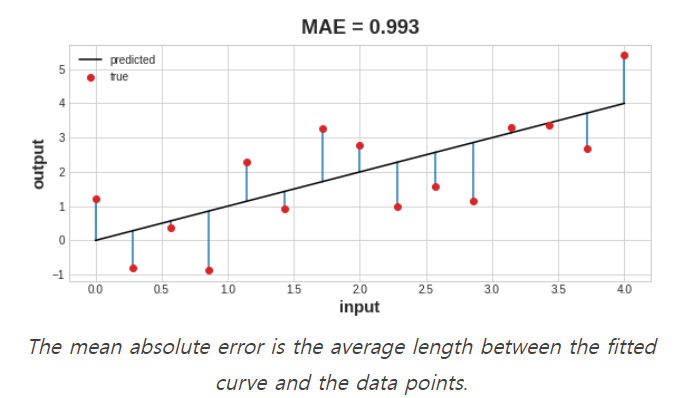
4. 기타 회귀 손실 함수
    - 평균 제곱 오차(MSE)
    - Huber 손실
    - 둘 다 Keras에서 사용 가능.

5. 훈련 과정에서의 손실 함수 역할
    - 가중치의 올바른 값을 찾는 가이드 역할
    - 낮은 손실값이 더 좋음.
    - 네크워크 목표를 정의.

#### The Optimizer - Stochastic Gradient Descent
1. 옵티마이저(optimizer) : 손실을 최소화하기 위해 가중치를 조정하는 알고리즘.
2. 확률적 경사하강법(Stochastic Gradient Descent, SGD) : 대부분의 딥러닝에서 사용되는 최적화 알고리즘.
    - 훈련 단계
        - 1. 훈련 데이터 일부를 샘플링하고, 이를 네트워크에 통과시켜 예측값을 얻는다.
        - 2. 예측값과 실제 값 사이의 손실을 측정한다.
        - 3. 손실을 줄이는 방향으로 가중치 조정한다. 그 후, 손실이 원하는 만큼 작아질 때까지(혹은 더 이상 감소하지 않을 때까지) 이를 반복한다.
3. 미니 배치(mini batch) : 각 반복에서 샘플링된 훈련 데이터의 일부분.
4. 에포크(epoch) : 훈련 데이터 전체를 한 번 다 통과한 것.
    - 에포크 수는 네트워크가 각 훈련 예제를 몇 번 보게 되는지를 나타낸다.

5. 훈련 과정 : 반복적으로 미니배치를 통해 가중치를 조정하며, 네트워크가 점차 최적의 상태로 수렴하는 과정.

#### Learning Rate and Batch Size
1. 학습률(learning rate) : 네트워크가 배치마다 얼마나 크게 이동하는지를 결정. 학습률이 작을수록 더 많은 배치를 필요로 한다.

2. 미니배치 크기와 학습률
    - 두 매개변수가 SGD 훈련에 가장 큰 영향을 미친다. 이들의 상호작용은 미묘하며 적절한 값을 선택하기 어렵다.

3. Adam : 적응형 학습률을 가진 SGD 알고리즘, 대부분의 문제에서 매개변수 조정 없이도 효과적이다. 범용 옵티마이저로 사용 가능하다.

#### Adding the Loss and Optimizer

- 손실 함수와 옵티마이저를 모델에 추가하는 코드
```
model.compile(
    optimizer = 'adam',
    loss = 'mae',
)
```


#### Example - Read Wine Quality

- Red Wine Quality 데이터셋
    - 약 1600개의 포르투갈 적포도주의 물리화학적 측정값과 시음 테스트를 통한 품질 평가 점수가 포함된 데이터셋.
    - 목표 : 물리화학적 측정값을 통해 와인의 품질 예측.
    - 데이터 전처리 : 각 특성(feature)을 [0,1] 범위로 재조정. 신경망의 성능 향상을 위해 중요한 작업.

In [3]:
# google 드라이브 접근
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [4]:
file_path = "/content/gdrive/My Drive/Colab Notebooks/DLData"

In [5]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv(file_path + '/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0,1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_)/ (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [6]:
print(X_train.shape)

(1119, 11)


In [7]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    optimizer = 'adam',
    loss = 'mae',
)

In [9]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - loss: 0.3119 - val_loss: 0.1356
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1402 - val_loss: 0.1253
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1317 - val_loss: 0.1200
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1188 - val_loss: 0.1140
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1159 - val_loss: 0.1076
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1112 - val_loss: 0.1048
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1064 - val_loss: 0.1075
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1073 - val_loss: 0.1011
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1042 - val_loss: 0.1030
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1013 - val_loss: 0.1010


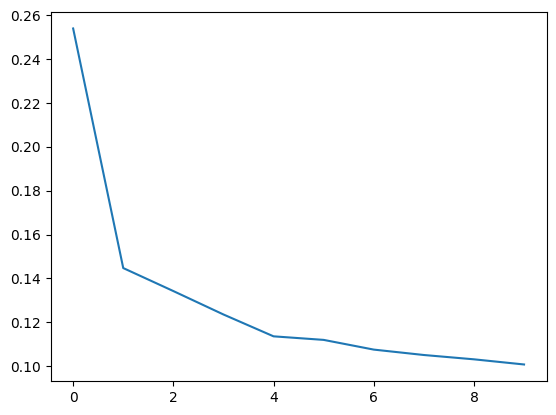

In [10]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)

# use Pandas native plot method
history_df['loss'].plot();

### Lesson 4. Overfitting and Underfitting

#### Introduction
- Keras는 에포크별로 훈련 및 검증 손실 기록을 유지한다.
- 이러한 학습 곡선을 해석하는 방법, 이를 통해 모델 개발을 최적화하기 위한 수정 전략에 대해 알아보자.

#### Interpreting the Learning Curves
- 신호(signal)와 잡음(noise)
    - 신호 : 예측에 도움이 되는 부분.
    - 잡음 : 실제로는 예측에 도움이 되지 않는 무작위 변동이나 중요하지 않은 패턴.
- 학습 곡선(learning curves)
    - 모델을 훈련할 때 에포크마다 훈련 세트에서의 손실을 그래프로 그린다.
    - 여기에 검증 데이터의 손실도 추가로 그래프로 표시할 수 있다.
    - 딥러닝 모델을 효과적으로 훈련하려면 이 곡선을 해석할 수 있어야 한다.
    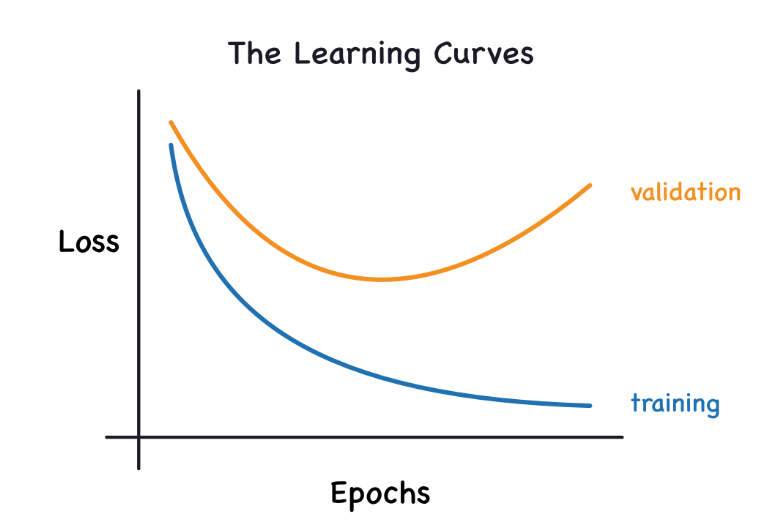

- 검증 손실
    - 보지 못한 데이터에 대한 예상 오류를 제공.
    - 모델이 신호를 학습할 때만 줄어들며, 잡음을 학습하면 훈련 손실과의 간격이 커진다.

- 과소적합과 과적합(underfitting & overfitting)
    - 모델이 신호를 충분히 학습하지 못하면 과소적합
    - 잡음을 너무 많이 학습하면 과적합 발생
    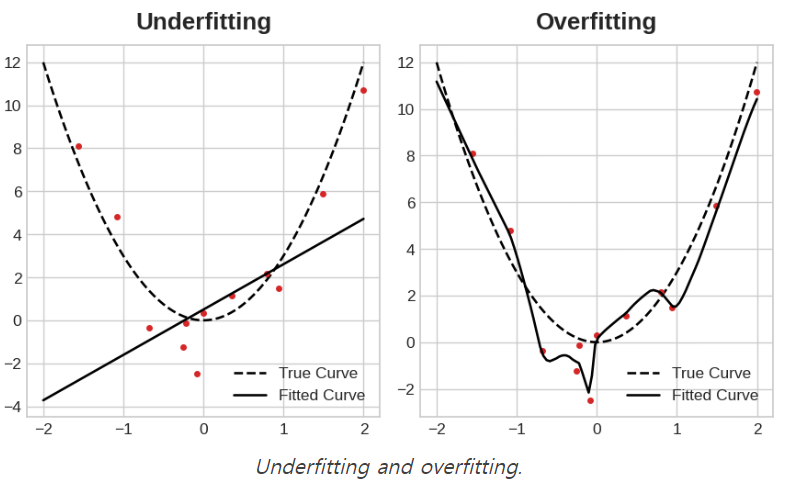
- 균형 찾기
    - 딥러닝에서 중요한 것은 신호를 최대한 학습하고 잡음을 최소화하는 균형을 찾는 것.


#### Capacity

- 모델 용량 : 모델이 학습할 수 있는 패턴의 크기과 복잡성을 의미.
- 과소적합 해결 : 네트워크 용량을 늘려야 함.
- 용량 증가 방법
    - 더 넓게 : 기존 layer에 더 많은 유닛 추가(선형 관계 학습에 유리)
    - 더 깊게 : 더 많은 layer 추가(비선형 관계 학습에 적합)
- 어떤 방법이 적합한지는 데이터셋에 따라 결정된다.

    ```
    model = keras.Sequential([
        layers.Dense(16, activation='relu'),
        layers.Dense(1),
    ])

    wider = keras.Sequential([
        layers.Dense(32, activation='relu'),
        layers.Dense(1),
    ])

    deeper = keras.Sequential([
        layers.Dense(16, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1),
    ])
    ```



#### Early Stopping

- 조기 종료(early stopping) : 검증 손실이 더 이상 감소하지 않을 때 훈련을 중단하는 기법.
- 최소 검증 손실 : 검증 손실이 최소가 된 시점의 모델을 유지하고, 이후 검증 손실이 상승하면 해당 지점으로 가중치를 되돌린다.
- 장점
    - 과적합 방지 : 더 이상 잡음을 학습하거나 과적합하지 않도록 방지한다.
    - 과소적합 방지 : 신호를 충분히 학습하기 전에 훈련을 중단하지 않도록 도와준다.

- 에포크 설정 : 에포크 수를 크게 설정한 후 조기 종료가 적절한 시점에 훈련을 중단한다.
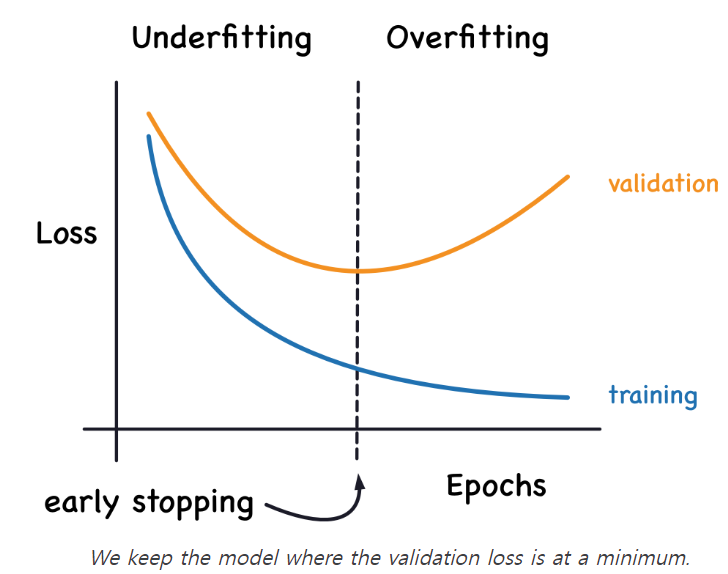

#### Adding Early Stopping

- Keras : 콜백을 통해 조기 종료 구현. 매 에포크 후 실행.

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimum amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

- 20 에포크 동안 검증 손실이 0.001만큼 개선되지 않으면 훈련 중단, 최상의 모델을 유지.

#### Example - Train a Model with Early Stopping

In [13]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv(file_path + '/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [14]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimum amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

model.compile(
    optimizer='adam',
    loss='mae',
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Minimum validation loss : 0.09141961485147476


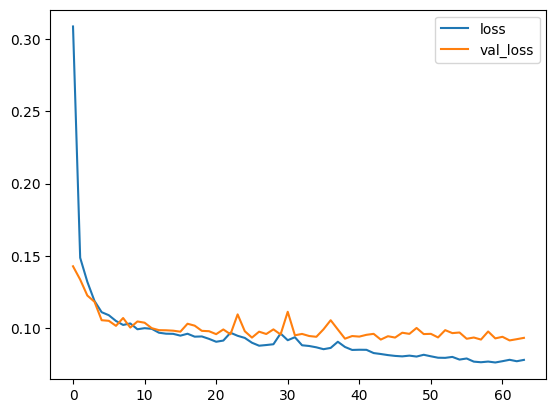

In [16]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping],  # put your callbacks in a list
    verbose = 0, # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot() ;
print("Minimum validation loss : {}".format(history_df['val_loss'].min()))

### Lesson 5. Dropout and Batch Normalization

#### Introduction

- 딥러닝에는 밀집층(Dense layers)만 있는 것이 아니라, 다양한 종류의 레이어가 존재하며, 일부는 뉴런 간 연결을 정의하고, 일부는 전처리나 변환을 수행한다.

- 뉴런을 포함하지 않지만, 모델에 유용한 기능을 추가하는 두 가지 특수 레이어에 대해 학습해보자.

#### Dropout
- 드롭아웃(Dropout) : 과적합을 방지하기 위한 레이어. 훈련 중에 레이어의 일부 입력 유닛을 무작위로 제외하여 특정 가중치 조합에 의존하지 않도록 한다.
- 과적합 방지 : 네트워크가 넓고 일반적인 패턴을 학습하도록 유도하며, 이러한 패턴은 더 견고한 경향이 있다.
- 앙상블 효과 : 드롭아웃은 작은 네트워크의 앙상블을 형성하여, 전체적으로 더 나은 성능을 발휘한다.
- 랜덤 포레스트와 유사 : 드롭아웃 개념은 랜덤 포레스트의 앙상블과 비슷한 방식으로 작동한다.

#### Adding Dropout
- `rate` 사용하여 드롭아웃 정의한다.
    ```
    keras.Sequential([
        # ...
        layers.Dropout(rate=0.3), # apply 30% dropout to the next layer
        layers.Dense(16),
        # ...

    )]
    ```


#### Batch Normalization
- 배치 정규화(Batch Normalization) : 훈련이 느리거나 불안정할 때 교정하는 특수 레이어.
- 데이터 정규화 : 네트워크에 입력하기 전에 데이터를 공통의 스케일로 맞추는 것이 좋으며, 이는 SGD의 안정적인 학습을 돕기 위함이다. (StandardScaler & MinMaxScaler)
- 내부 정규화 : 배치 정규화 레이어는 각 배치를 정규화하고 학습 가능한 매개변수로 새로운 스케일로 조정한다.
- 효과
    - 최적화 과정의 보조 역할 : 배치 정규화가 있는 모델은 훈련을 완료하는 데 필요한 에포크 수가 적다.
    - 훈련의 정체 문제 수정 : 훈련 중 발생하는 경우 배치 정규화를 추가하는 것이 유용하다.

#### Adding Batch Normalization


```
layers.Dense(16, activation='relu'),
layers.BatchNormalization(),
```




```
layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),
```




#### Example - Using Dropout and Batch Normalization

In [17]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


import pandas as pd
red_wine = pd.read_csv(file_path + '/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

<ipython-input-17-5f33026d043c>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [19]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


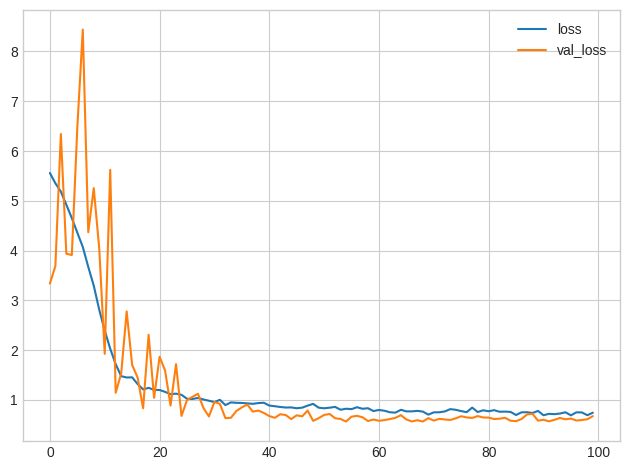

In [21]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)

# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot() ;

### Lesson 6. Binary Classification

#### Introduction

- 신경망을 또 다른 일반적인 기계 학습 문제인 '분류'에 적용할 것이다.
- 주요 차이점은 사용하는 손실 함수와 최종 레이어에서 원하는 출력의 종류.

#### Binary Classification

- 이진 분류 : 두 개의 클래스로 분류하는 문제. 예 : 구매 가능성, 신용 카드 사기, 새로운 행성 탐지 등.

- 클래스 레이블 할당 : 원시 데이터에서 클래스는 문자열로 표현될 수 있으며, 이를 숫자 레이블(0, 1)로 변환하여 신경망이 사용할 수 있는 형태로 만든다.


#### Accuracy and Cross-Entropy

- 정확도(Accuracy) : 올바른 예측의 비율로 정의, 모든 것이 동일할 때 클래스가 비슷한 빈도로 발생할 경우 유용하다.
    - 한계 : 손실 함수로 사용할 수 없으며, 부드럽게 변화하지 않고 점프 형태로 변화한다.
- 교차 엔트로피(Cross-Entropy) : 손실 함수의 대체 수단, 확률 간의 거리를 측정한다.
    - 목표 : 네트워크가 올바른 클래스를 확률 1.0으로 예측하도록 하며, 예측 확률이 1.0에서 멀어질수록 교차 엔트로피 손실이 증가한다.
    - 잘못된 확률 예측에 대해 패널티를 부여한다.

- 분류 문제에서 손실 함수로 교차 엔트로피를 사용하고, 이는 정확도와 같은 다른 지표도 개선시킨다.

    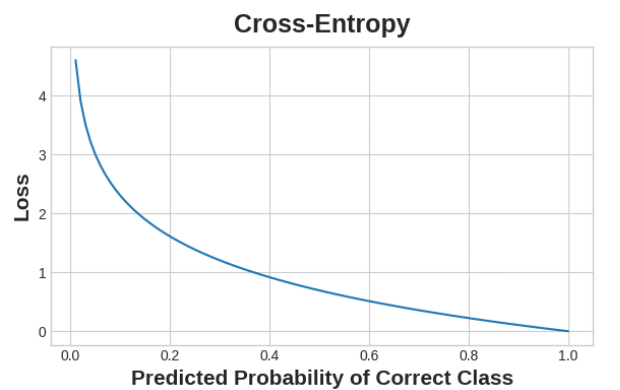



#### Making Probabilities with the Sigmoid Function

- 확률 입력 필요 : 교차 엔트로피와 정확도 함수는 0에서 1 사이의 확률을 입력으로 요구한다.
    - 시그모이드 활성화 함수 추가
- 시그모이드 활성화 함수 : 실수 값을 확률로 변환하기 위해 사용되며, 값은 0~1 구간으로 매핑된다.
- 최종 클래스 예측 : 임계 확률(일반적으로 0.5) 설정하여 클래스를 결정한다. 0.5 미만은 레이블 0, 0.5 이상은 레이블 1.
    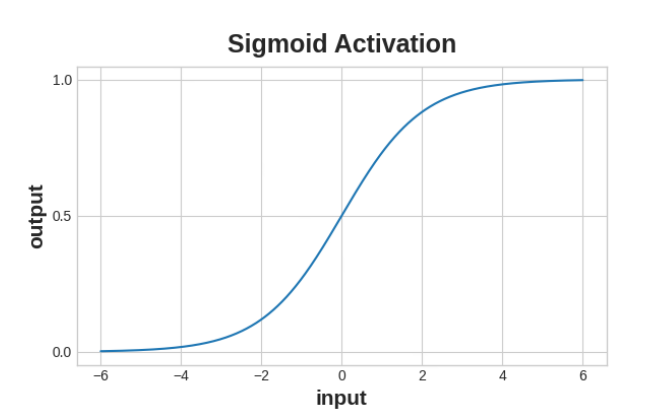

#### Example - Binary Classification

In [31]:
import pandas as pd
from IPython.display import display

ion = pd.read_csv(file_path + '/ion.csv', index_col=0)
display(ion.head())

df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [32]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [34]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

Best Validation Loss : 0.3861
Best Validation Accuracy : 0.9238


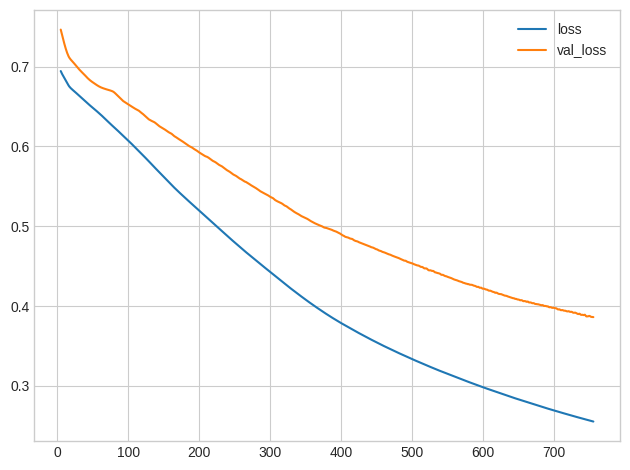

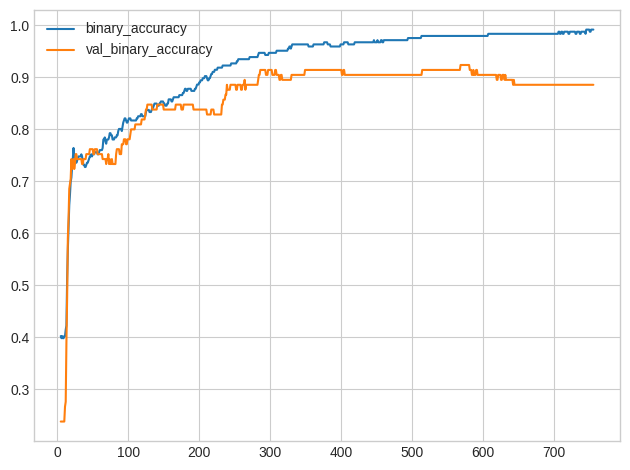

In [35]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:,['loss','val_loss']].plot()
history_df.loc[5:,['binary_accuracy','val_binary_accuracy']].plot()

print(('Best Validation Loss : {:0.4f}' +\
       '\nBest Validation Accuracy : {:0.4f}')\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))